#Using Data Wrangeling techniques to clean and analyse a Retail Transactions Dataset.

In [ ]:
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00


In [ ]:
import lifetimes
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes import BetaGeoFitter # BG/NBD
from lifetimes import GammaGammaFitter # Gamma-Gamma Model
from lifetimes.plotting import plot_frequency_recency_matrix
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Seems like we are missing a customer id number for this dataset to complete the CLV analysis but fortunally we do have names whcih repeat everytime that customer makes an order so I will create a column called Customer_Id and generate a random cutomer number for each of the customers in the dataset.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/EslinLeiva/Data-Wrangling-and-Machine-Learning/main/Retail_Transactions_Dataset.csv')
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2020-12-21 19:42:52,Cheyenne Newman,['Hair Gel'],6,12.77,Debit Card,New York,Convenience Store,True,Student,Winter,None
1,1000000001,2020-07-06 07:45:16,Emily Fitzgerald,"['Tuna', 'Bread', 'Tissues', 'Trash Bags']",5,13.88,Debit Card,Houston,Supermarket,False,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2021-10-02 06:28:44,Michael Webb,"['Jam', 'Soap', 'Ketchup']",7,47.02,Debit Card,Miami,Convenience Store,False,Young Adult,Winter,None
3,1000000003,2022-01-10 05:39:02,Kimberly Lin,['BBQ Sauce'],9,83.86,Mobile Payment,Seattle,Warehouse Club,True,Senior Citizen,Summer,Discount on Selected Items
4,1000000004,2021-10-13 07:28:47,Cathy Hernandez,"['Hand Sanitizer', 'Bread', 'Extension Cords',...",4,30.55,Debit Card,Houston,Warehouse Club,False,Senior Citizen,Spring,None


In [ ]:
df['Customer_Name'].value_counts().head(15)

Michael Smith        21
John Smith           17
David Smith          15
Michael Johnson      13
James Smith          12
Michael Miller       12
Michael Brown        11
Jennifer Williams    10
Lisa Smith           10
Robert Smith          9
Jessica Smith         9
Matthew Williams      9
Angela Johnson        9
Michelle Smith        8
Jason Brown           8
Name: Customer_Name, dtype: int64

In [ ]:
name_counts = df['Customer_Name'].value_counts()
print("Name occurrences:\n", name_counts)

customer_ids = {name: idx for idx, name in enumerate(df['Customer_Name'].unique(), 1)}

df['Customer_Id'] = df['Customer_Name'].map(customer_ids)

Name occurrences:
 Michael Smith      21
John Smith         17
David Smith        15
Michael Johnson    13
James Smith        12
                   ..
Aaron White         1
Megan Acevedo       1
Curtis Knight       1
Mary Lin            1
Devin Lawrence      1
Name: Customer_Name, Length: 25725, dtype: int64


In [ ]:
#Mapping the customer names to the new column Customer_Id worked perfectly
df['Customer_Id'].value_counts().head(15)

1960    21
2227    17
2535    15
6634    13
642     12
1105    12
2607    11
1286    10
500     10
261      9
1141     9
6892     9
44       9
151      8
2360     8
Name: Customer_Id, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     30000 non-null  int64  
 1   Date               30000 non-null  object 
 2   Customer_Name      30000 non-null  object 
 3   Product            30000 non-null  object 
 4   Total_Items        30000 non-null  int64  
 5   Total_Cost         30000 non-null  float64
 6   Payment_Method     30000 non-null  object 
 7   City               30000 non-null  object 
 8   Store_Type         30000 non-null  object 
 9   Discount_Applied   30000 non-null  bool   
 10  Customer_Category  30000 non-null  object 
 11  Season             30000 non-null  object 
 12  Promotion          30000 non-null  object 
 13  Customer_Id        30000 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(9)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,Transaction_ID,Total_Items,Total_Cost,Customer_Id
count,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,1.000015e+09,5.497800,52.504527,12085.216300
std,8.660398e+03,2.873686,27.363732,7466.102179
min,1.000000e+09,1.000000,5.000000,1.000000
25%,1.000007e+09,3.000000,28.687500,5500.750000
50%,1.000015e+09,5.000000,52.480000,11707.500000
75%,1.000022e+09,8.000000,76.100000,18481.250000
max,1.000030e+09,10.000000,99.990000,25725.000000


In [ ]:
df.isnull().sum()

Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
Customer_Id          0
dtype: int64

In [ ]:
df.dropna(inplace = True)

# Data Cleaning

In [ ]:
Renaming
df = df.rename(columns={'Transaction_ID': 'Invoice_Number', 'Date': 'Invoice_Date', 'Total_Items': 'Quantity', 'Total_Cost' : 'Total_Price'})

In [ ]:
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Invoice_Number     30000 non-null  int64         
 1   Invoice_Date       30000 non-null  datetime64[ns]
 2   Customer_Name      30000 non-null  object        
 3   Product            30000 non-null  object        
 4   Quantity           30000 non-null  int64         
 5   Total_Price        30000 non-null  float64       
 6   Payment_Method     30000 non-null  object        
 7   City               30000 non-null  object        
 8   Store_Type         30000 non-null  object        
 9   Discount_Applied   30000 non-null  bool          
 10  Customer_Category  30000 non-null  object        
 11  Season             30000 non-null  object        
 12  Promotion          30000 non-null  object        
 13  Customer_Id        30000 non-null  int64         
dtypes: boo

#Visualization

In [ ]:
# Recency
latest_date = df['Invoice_Date'].max() + dt.timedelta(days=1)
rfm = df.groupby('Customer_Id').agg({
    'Invoice_Date': lambda x: (latest_date - x.max()).days,
    'Invoice_Number': 'count',
    'Total_Price': 'sum'}).reset_index()

rfm.rename(columns={'Invoice_Date': 'Recency',
                    'Invoice_Number': 'Frequency',
                    'Total_Price': 'MonetaryValue'}, inplace=True)

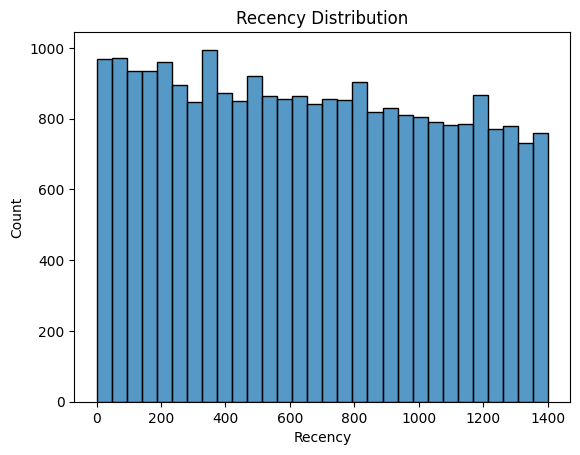

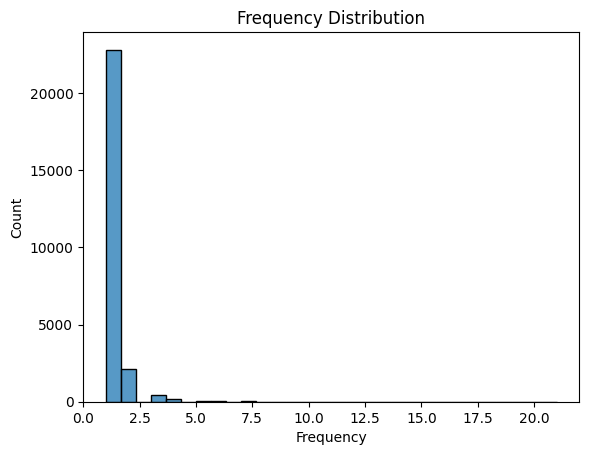

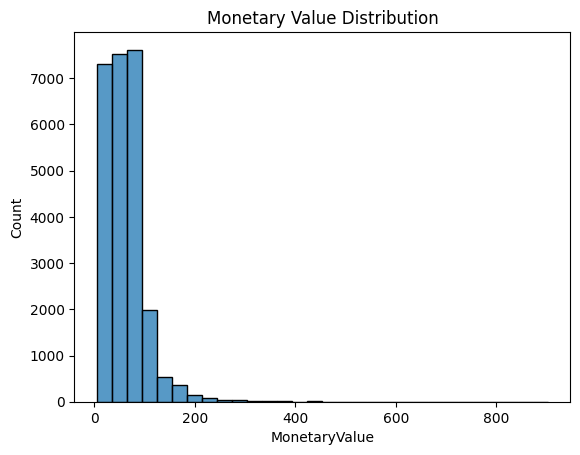

In [ ]:
# Recency distribution
sns.histplot(data=rfm, x='Recency', bins=30)
plt.title('Recency Distribution')
plt.show()

# Frequency distribution
sns.histplot(data=rfm, x='Frequency', bins=30)
plt.title('Frequency Distribution')
plt.show()

# Monetary distribution
sns.histplot(data=rfm, x='MonetaryValue', bins=30)
plt.title('Monetary Value Distribution')
plt.show()

In [ ]:
# Ack extreme outliers for Quanity and UnitPrice
# Let's clean the data (however YOU decide to clean... just make sure it is logical)
df = df[df['Quantity'] > 0 ] # exclude the orders with 0 value
df = df[df['Total_Price'] > 0] # exclude the Unit Price with 0 value

In [ ]:
def find_boundaries(df, variable,q1=0.05,q2=0.95):
    # the boundaries are the quantiles
    lower_boundary = df[variable].quantile(q1) # lower quantile
    upper_boundary = df[variable].quantile(q2) # upper quantile
    return upper_boundary, lower_boundary
def capping_outliers(df,variable):
    upper_boundary,lower_boundary =  find_boundaries(df,variable)
    df[variable] = np.where(df[variable] > upper_boundary, upper_boundary,
                       np.where(df[variable] < lower_boundary, lower_boundary, df[variable]))

In [ ]:
capping_outliers(df,'Total_Price')
capping_outliers(df,'Quantity')

In [ ]:
df.describe()

,Invoice_Number,Quantity,Total_Price,Customer_Id
count,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,1.000015e+09,5.497800,52.508941,12085.216300
std,8.660398e+03,2.873686,26.961349,7466.102179
min,1.000000e+09,1.000000,9.950000,1.000000
25%,1.000007e+09,3.000000,28.687500,5500.750000
50%,1.000015e+09,5.000000,52.480000,11707.500000
75%,1.000022e+09,8.000000,76.100000,18481.250000
max,1.000030e+09,10.000000,95.201000,25725.000000


#RFM

In [ ]:
df.columns

Index(['Invoice_Number', 'Invoice_Date', 'Customer_Name', 'Product', 'Quantity', 'Total_Price', 'Payment_Method', 'City', 'Store_Type', 'Discount_Applied', 'Customer_Category', 'Season', 'Promotion', 'Customer_Id'], dtype='object')

In [ ]:
clv = lifetimes.utils.summary_data_from_transaction_data(df,'Customer_Id','Invoice_Date','Total_Price',observation_period_end='2023-11-01')

In [ ]:
clv.head()

,frequency,recency,T,monetary_value
Customer_Id,,,,
1,0.0,0.0,1045.0,0.00
2,1.0,63.0,1213.0,15.91
3,1.0,394.0,1154.0,47.02
4,0.0,0.0,660.0,0.00
5,0.0,0.0,749.0,0.00


In [ ]:
# let's filter so that we only catch customers who have made more than 1 purchase
clv = clv[clv['frequency']>1]

In [ ]:
clv.head()

,frequency,recency,T,monetary_value
Customer_Id,,,,
19,2.0,459.0,664.0,75.105000
30,2.0,389.0,512.0,35.795000
44,8.0,1251.0,1342.0,55.878875
51,5.0,1172.0,1249.0,36.494000
55,3.0,345.0,888.0,43.636667


# BG/NBD Model

In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.001)  # This will allow you to predict FUTURE purchase by taking into account F, R, T  penalizer is used to avoid overfitting
bgf.fit(clv['frequency'], clv['recency'], clv['T'])

<lifetimes.BetaGeoFitter: fitted with 757 subjects, a: 0.00, alpha: 2406.24, b: 0.00, r: 6.23>

In [ ]:
t = 180 # 6 month/180 day period
clv['expected_purc_6_months'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, clv['frequency'], clv['recency'], clv['T'])
clv.sort_values(by='expected_purc_6_months',ascending=False).head(5)

,frequency,recency,T,monetary_value,expected_purc_6_months
Customer_Id,,,,,
1960,19.0,1273.0,1297.0,45.578947,1.226413
2227,16.0,1326.0,1385.0,43.203125,1.055512
2535,14.0,1135.0,1157.0,60.247214,1.022019
6634,12.0,977.0,1250.0,55.340083,0.897562
1105,11.0,1202.0,1269.0,56.407364,0.843945


# Gamma-Gamma Model

In [ ]:
clv[['frequency','monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.042579
monetary_value,0.042579,1.000000


In [ ]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(clv["frequency"],
        clv["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 757 subjects, p: 4.41, q: 0.79, v: 4.25>

In [ ]:
clv['six_Months_CLV']=ggf.customer_lifetime_value(bgf,
                                   clv["frequency"],
                                   clv["recency"],
                                   clv["T"],
                                   clv["monetary_value"],
                                   time=6,
                                   freq='D',
                                   discount_rate=0.01)
clv.sort_values('six_Months_CLV',ascending=False).head()

,frequency,recency,T,monetary_value,expected_purc_6_months,six_Months_CLV
Customer_Id,,,,,,
2535,14.0,1135.0,1157.0,60.247214,1.022019,59.981429
1960,19.0,1273.0,1297.0,45.578947,1.226413,54.396343
9840,2.0,185.0,292.0,90.290000,0.549136,50.230858
6634,12.0,977.0,1250.0,55.340083,0.897562,48.480042
1733,6.0,1012.0,1090.0,76.555167,0.629734,47.378067


In [ ]:
clv['Segment'] =  pd.qcut(clv['six_Months_CLV'],4,labels = ['Hibernating','Need Attention', 'LoyalCustomers', 'Champions'])

In [ ]:
clv.head()

,frequency,recency,T,monetary_value,expected_purc_6_months,six_Months_CLV,Segment
Customer_Id,,,,,,,
19,2.0,459.0,664.0,75.105000,0.482601,36.891169,Champions
30,2.0,389.0,512.0,35.795000,0.507738,19.057066,Need Attention
44,8.0,1251.0,1342.0,55.878875,0.683441,37.464876,Champions
51,5.0,1172.0,1249.0,36.494000,0.553096,20.145254,Need Attention
55,3.0,345.0,888.0,43.636667,0.504426,22.310384,Need Attention


In [ ]:
clv.groupby('Segment').mean()

,frequency,recency,T,monetary_value,expected_purc_6_months,six_Months_CLV
Segment,,,,,,
Hibernating,2.284211,802.568421,1139.152632,30.611611,0.433758,13.870455
Need Attention,2.507937,777.222222,1100.925926,48.474679,0.450259,22.116378
LoyalCustomers,2.698413,789.185185,1090.111111,59.950974,0.461614,27.729475
Champions,3.724868,777.862434,1053.105820,71.807407,0.517422,36.328581
